# Image Enhancement by 3DUnet

## Install environment

- Create conda environment from environment.yaml by following command: ```conda env create -f environment.yml```. You can change the environment name in the yml file

- Activate environment 
```conda activate 3dunet``` (change 3dunet to the name in .yml file)

(Alternative)
If above doesn't work, try to follow the pytorch-3dunet instruction
- Install pytorch-3dunet, following instructions from https://github.com/wolny/pytorch-3dunet.git
- Install ipywidgets, matplotlib, imageio manually


## Data Preparation

The input data should be 3D images stored in tif files, with dimension order (Z,Y,X). Establish separate folders for the training, validation, and test datasets. For training and validation, it should contain two sub-folders to store raw images and groundtruth data, and an extra folder to store weights if train with ```PixelWiseCrossEntropyLoss``` (see https://github.com/wolny/pytorch-3dunet/blob/2eaf45a49828229b2bf6fd9bba01519a339d3067/README.md). 



## Configuration File

Before performing training and test, prepare the configuration files in yaml format. See ```train_config.yaml``` and ```test_config.yaml``` included. 
- In train_config.yaml
  - define the directory to save the model weights through "trainer: checkpoint_dir:"
  - set the directory to training and validation data, through ```loaders:train:file_paths``` and ```loaders:test:file_paths``` seperately
  - set ```loaders:raw_internal_path``` as the subfolder storing of raw images, 
  - set ```loaders:label_internal_path``` as the subfolder storing ground_truth images
  - set ```loaders:weight_internal_path:``` as the subfolder storing weights files (if weights are used). It's null as default.

# Training

## Load training config from file

In [1]:
from train_regression import train_3dunet_regression, load_config_yaml

# Path to config file
config_file = "train_config.yaml"

# Load config
config = load_config_yaml(config_file)


## Visualize Dataset

### Visualize raw images

Read image array from tif file and visualize them

- Give the path to dataset folder, such as "path/to/dataset"
- Use TIFDataset.load_dataset_files() to load all tif files in the dataset, retuern a list of [(raw_image_file, groundtruth_file_path, weight_file_path(optional)), ...
- Choose the file to visualize by given the index. 

In [8]:
import tifffile
import numpy as np
from dataloader import TIFDataset

%matplotlib inline
from skimage import exposure

def normalize(image, new_min=0, new_max=255, dtype = np.uint8):
    image_out = exposure.rescale_intensity(image, in_range=(np.min(image), np.max(image)), out_range=(new_min, new_max))
    return image_out.astype(dtype)
    

In [3]:
# get config for data loaders
config_loaders = config['loaders']

# Get image file paths from config
train_file_path = config_loaders['train']['file_paths'][0]
file_paths = TIFDataset.load_dataset_files(train_file_path)

# Uncomment following lines to print all files 
# for rf, gf, _ in file_paths:
#     print(f"*---{rf}\n |--{gf}")

# Choose a file to visualize 
# get image path 
raw_file_path = file_paths[0][0]
# get groundtruth file path
gt_file_path = file_paths[0][1]
print(f"- Visualize following files: \n\t{raw_file_path}\n\t{gt_file_path}")

# read image data
raw_im_arr = tifffile.imread(raw_file_path)
gt_im_arr = tifffile.imread(gt_file_path)

print(f"- Image shape \n\t raw image: {raw_im_arr.shape} \n\t Gt image {gt_im_arr.shape}")

- Visualize following files: 
	/Users/w.zhao/Projects/MemSeg/Dataset/raw_memb/train/raw_images/201223_RL57M_pos1.tif
	/Users/w.zhao/Projects/MemSeg/Dataset/raw_memb/train/ground_truth/201223_RL57M_pos1_gt.tif
- Image shape 
	 raw image: (64, 406, 406) 
	 Gt image (64, 406, 406)


In [6]:

from visualize import display_slices

# Visualize 3d image
display_slices(normalize(raw_im_arr))

interactive(children=(IntSlider(value=31, description='slice', max=63), Output()), _dom_classes=('widget-inter…

<function visualize.display_slices.<locals>._show(slice=(0, 63))>

Show raw data and groundtruth (need to normalize them to the same format)

In [9]:
gt_im_arr_norm = normalize(gt_im_arr)
raw_im_arr_norm = normalize(raw_im_arr)


display_slices(np.concatenate([raw_im_arr_norm, gt_im_arr_norm], axis=2))

interactive(children=(IntSlider(value=31, description='slice', max=63), Output()), _dom_classes=('widget-inter…

<function visualize.display_slices.<locals>._show(slice=(0, 63))>

Show orthogonal views

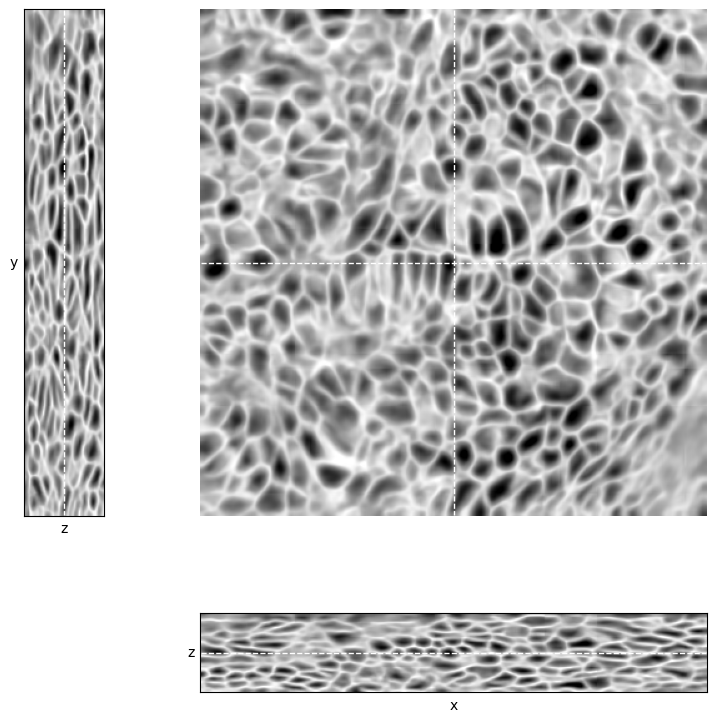

In [10]:
from visualize import show_orthogonal, rescale
import matplotlib.pyplot as plt

fig, axes = plt.subplots( figsize=(12, 8))
im = np.expand_dims(rescale(gt_im_arr), -1)
im.shape, im.dtype
show_orthogonal(im, axes=axes, show_slices=True)

## Train Model

- Use train_3dunet_regression to train the model

In [ ]:
from train_regression import train_3dunet_regression


# Start to train
train_3dunet_regression(config_file)

# Prediction

Load config for prediction

In [ ]:
test_config_file_path = "test_config.yaml"
test_config = load_config_yaml(test_config_file_path)

 Use ```predict``` to train the model

In [ ]:
from predict_regression import predict

predict(config)